In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier
import time
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = fetch_covtype()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='CoverType')

In [3]:
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts().sort_index())

X shape: (581012, 54)
y distribution:
 CoverType
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


In [4]:
print("\nFeature sample:\n", X.iloc[:, :10].head())


Feature sample:
    Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0 

In [5]:
print("\nSome columns:", X.columns[:20].tolist())


Some columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5']


In [6]:
print("\nNumeric features summary:")
display(X.describe().T)


Numeric features summary:


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTrain/test sizes:", X_train.shape, X_test.shape)


Train/test sizes: (464809, 54) (116203, 54)


In [8]:
continuous_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                   'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

In [9]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [10]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
t0 = time.time()
rf.fit(X_train_scaled, y_train)
t_rf = time.time() - t0
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f"\nRandomForest baseline - acc: {acc_rf:.4f}, macro F1: {f1_rf:.4f}, train time: {t_rf:.1f}s")


RandomForest baseline - acc: 0.9533, macro F1: 0.9240, train time: 143.0s


In [11]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42)
t0 = time.time()
xgb.fit(X_train_scaled, y_train_xgb)
t_xgb = time.time() - t0

y_pred_xgb = xgb.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
f1_xgb = f1_score(y_test_xgb, y_pred_xgb, average='macro')
print(f"XGBoost baseline - acc: {acc_xgb:.4f}, macro F1: {f1_xgb:.4f}, train time: {t_xgb:.1f}s")


XGBoost baseline - acc: 0.8696, macro F1: 0.8539, train time: 59.2s



=== RandomForest baseline Evaluation ===
Accuracy: 0.953271430169617
Macro F1: 0.9239512433139517

Classification report:
               precision    recall  f1-score   support

           1     0.9630    0.9417    0.9523     42368
           2     0.9485    0.9726    0.9604     56661
           3     0.9395    0.9592    0.9492      7151
           4     0.9181    0.8579    0.8870       549
           5     0.9518    0.7688    0.8506      1899
           6     0.9278    0.8914    0.9093      3473
           7     0.9731    0.9451    0.9589      4102

    accuracy                         0.9533    116203
   macro avg     0.9460    0.9053    0.9240    116203
weighted avg     0.9534    0.9533    0.9530    116203



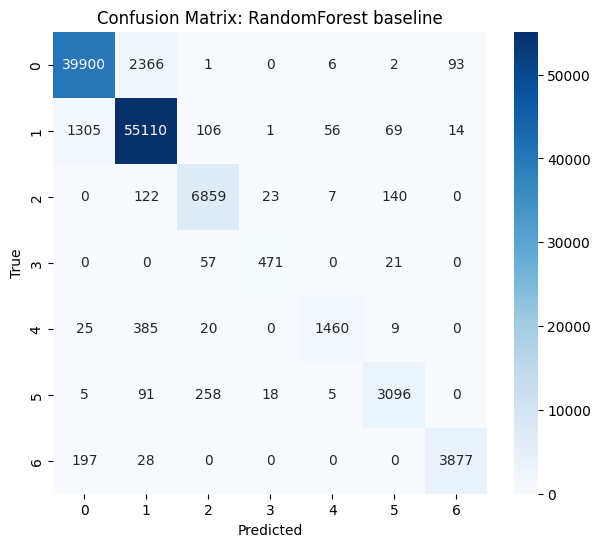


=== XGBoost baseline Evaluation ===
Accuracy: 0.8696074972246843
Macro F1: 0.8538690819296866

Classification report:
               precision    recall  f1-score   support

           0     0.8627    0.8407    0.8515     42368
           1     0.8671    0.8963    0.8815     56661
           2     0.8899    0.9095    0.8996      7151
           3     0.8787    0.8579    0.8682       549
           4     0.8891    0.6077    0.7219      1899
           5     0.8493    0.7970    0.8223      3473
           6     0.9508    0.9139    0.9320      4102

    accuracy                         0.8696    116203
   macro avg     0.8839    0.8319    0.8539    116203
weighted avg     0.8697    0.8696    0.8690    116203



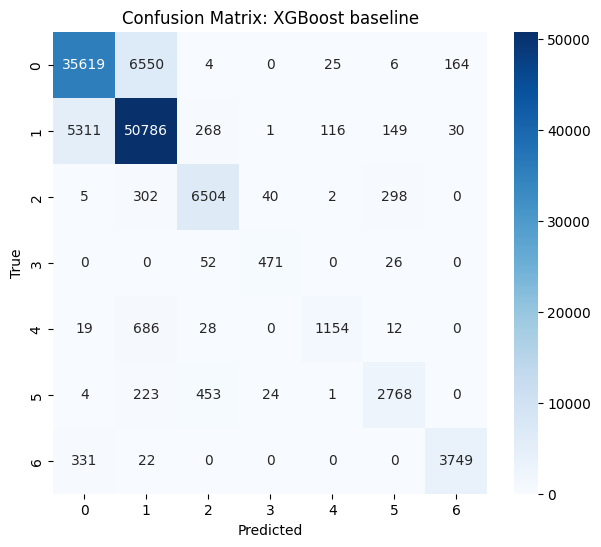

In [12]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Macro F1:", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model("RandomForest baseline", y_test, y_pred_rf)
evaluate_model("XGBoost baseline", y_test_xgb, y_pred_xgb)


Top 15 RF features:
 Elevation                             0.240072
Horizontal_Distance_To_Roadways       0.118071
Horizontal_Distance_To_Fire_Points    0.110950
Horizontal_Distance_To_Hydrology      0.060759
Vertical_Distance_To_Hydrology        0.057779
Aspect                                0.048021
Hillshade_Noon                        0.042969
Hillshade_9am                         0.041077
Hillshade_3pm                         0.040795
Slope                                 0.032945
Wilderness_Area_3                     0.029198
Soil_Type_21                          0.015798
Soil_Type_9                           0.013150
Wilderness_Area_2                     0.012258
Soil_Type_3                           0.011711
dtype: float64


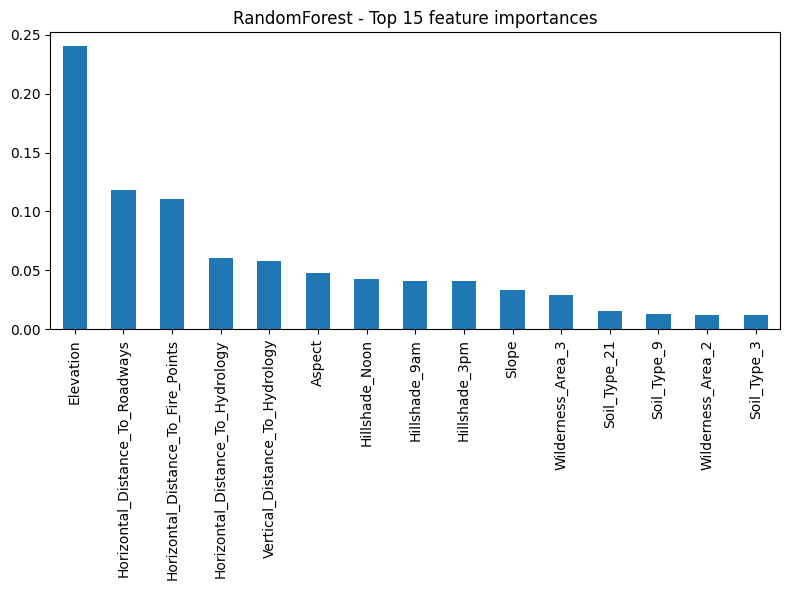

In [13]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 RF features:\n", importances_rf.head(15))
plt.figure(figsize=(8,6))
importances_rf.head(15).plot(kind='bar')
plt.title('RandomForest - Top 15 feature importances')
plt.tight_layout()
plt.show()

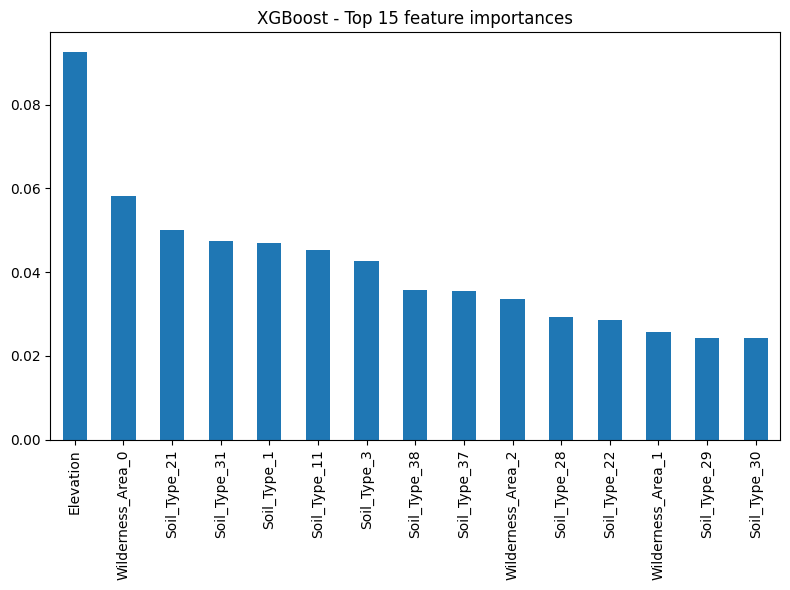

In [14]:
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances_xgb.head(15).plot(kind='bar')
plt.title('XGBoost - Top 15 feature importances')
plt.tight_layout()
plt.show()

In [15]:
rf_param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 35],
    'max_features': ['sqrt', 0.3, 0.5],
    'min_samples_split': [2, 5, 10]
}

rf_rand = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_dist,
    n_iter=5,
    scoring='f1_macro',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
t0 = time.time()
rf_rand.fit(X_train_scaled, y_train)
t_rf_rand = time.time() - t0
print(f"\nBest RF params: {rf_rand.best_params_}, best score (cv): {rf_rand.best_score_:.4f}, time: {t_rf_rand:.1f}s")

Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 0.3, 'max_depth': None}, best score (cv): 0.9184, time: 3353.2s



=== RandomForest tuned Evaluation ===
Accuracy: 0.9647169178076298
Macro F1: 0.9389915506242528

Classification report:
               precision    recall  f1-score   support

           1     0.9710    0.9582    0.9645     42368
           2     0.9631    0.9778    0.9704     56661
           3     0.9512    0.9697    0.9603      7151
           4     0.9138    0.8689    0.8908       549
           5     0.9516    0.8389    0.8917      1899
           6     0.9471    0.9128    0.9296      3473
           7     0.9733    0.9581    0.9656      4102

    accuracy                         0.9647    116203
   macro avg     0.9530    0.9263    0.9390    116203
weighted avg     0.9647    0.9647    0.9646    116203



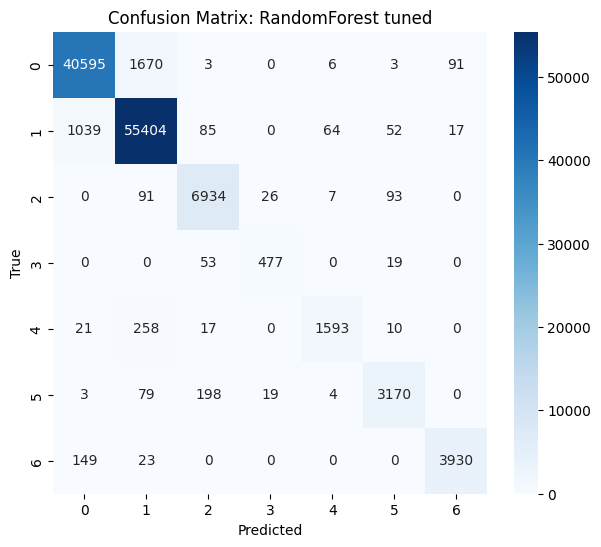

In [21]:
best_rf = rf_rand.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test_scaled)


evaluate_model("RandomForest tuned", y_test, y_pred_rf_tuned)



In [23]:
results = {
    'model': ['RF_baseline', 'RF_tuned', 'XGB_baseline'],
    'accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_xgb + 1),
    ],
    'macro_f1': [
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_rf_tuned, average='macro'),
        f1_score(y_test, y_pred_xgb + 1, average='macro')
    ]
}
print(pd.DataFrame(results))


          model  accuracy  macro_f1
0   RF_baseline  0.953271  0.923951
1      RF_tuned  0.964717  0.938992
2  XGB_baseline  0.869607  0.853869
